# Data Analysis

In [ ]:
import os
output_dir = "/content/drive/MyDrive/PROJECT/figures"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Movies dataset

In [ ]:
movies_data = pd.read_csv('/content/drive/MyDrive/PROJECT/movie_screenplays/movies_tmdb_details.csv')

In [ ]:
movies_data

,ID,TITLE,YEAR,MOVIE_ID,GENRES,OVERVIEW,RUNTIME [MIN],RATING,BUDGET,REVENUE,DIRECTOR,DIRECTOR_GENDER
0,0,"10,000 BC",2008,7840,"Adventure, Action, Drama, Fantasy",A prehistoric epic that follows a young mammot...,109,5.501,105000000,269784201,Roland Emmerich,Man
1,1,12 Strong,2018,429351,"War, Drama, Action, History",A team of special forces head into Afghanistan...,130,6.347,35000000,67450815,Nicolai Fuglsig,Man
2,2,12 Years a Slave,2013,76203,"Drama, History","In the pre-Civil War United States, Solomon No...",134,7.936,20000000,187000000,Steve McQueen,Man
3,3,127 Hours,2010,44115,"Adventure, Drama, Thriller",The true story of mountain climber Aron Ralsto...,94,7.085,18000000,35700000,Danny Boyle,Man
4,4,1408,2007,3021,"Horror, Mystery",A man who specializes in debunking paranormal ...,104,6.695,25000000,133000000,Mikael Håfström,Man
...,...,...,...,...,...,...,...,...,...,...,...,...
1347,1350,Zootopia,2016,269149,"Animation, Adventure, Family, Comedy","Determined to prove herself, Officer Judy Hopp...",109,7.755,150000000,1025521689,Byron Howard,Man
1348,1351,mid90s,2018,437586,"Drama, Comedy","In 1990s Los Angeles, a 13-year-old spends his...",86,7.485,1700000,9303022,Jonah Hill,Man
1349,1352,mother!,2017,381283,"Drama, Horror",A couple's relationship is tested when uninvit...,121,6.965,30000000,44516999,Darren Aronofsky,Man
1350,1353,"tick, tick... BOOM!",2021,537116,"Drama, Music","On the brink of turning 30, a promising theate...",120,7.609,0,0,Lin-Manuel Miranda,Man


In [ ]:
movies_data['DIRECTOR_GENDER'].value_counts()

,count
DIRECTOR_GENDER,
Man,1185
Woman,164


In [ ]:
movies_data = movies_data[~movies_data['DIRECTOR_GENDER'].isin(['Unknown','Other'])]

Director gender

In [ ]:
gender_counts = (movies_data['DIRECTOR_GENDER'].value_counts())

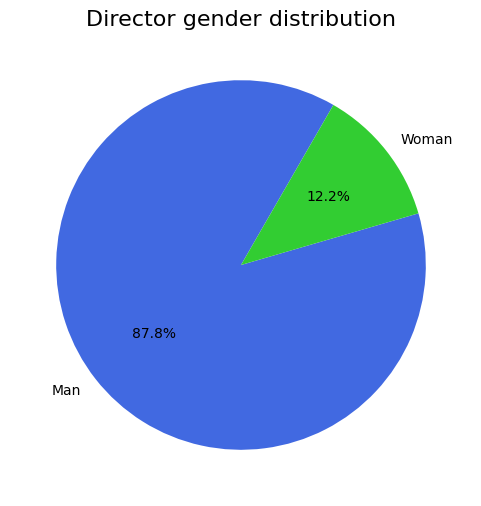

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts.values,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=['royalblue', 'limegreen'])

plt.title("Director gender distribution", fontsize=16)
plt.savefig(f"{output_dir}/director_gender.png", dpi=300, bbox_inches="tight")
plt.show()

Year and genre

In [ ]:
movies_per_year_gender = (
    movies_data.groupby(['YEAR', 'DIRECTOR_GENDER'])['MOVIE_ID']
    .count()
    .unstack(fill_value=0)
    .sort_index())
movies_per_year_gender = movies_per_year_gender[['Woman','Man']]
movies_per_year_gender[0:4]

DIRECTOR_GENDER,Woman,Man
YEAR,,
1999,0,1
2000,6,55
2001,1,51
2002,0,48


In [ ]:
genre_one_hot = movies_data['GENRES'].str.get_dummies(sep=', ')
genre_one_hot = pd.concat([genre_one_hot, movies_data['DIRECTOR_GENDER']], axis=1)
genre_counts_gender = genre_one_hot.groupby('DIRECTOR_GENDER').sum().T
genre_counts_gender['Total'] = genre_counts_gender.sum(axis=1)
genre_counts_gender = genre_counts_gender.sort_values(by='Total', ascending=True)
genre_counts_gender = genre_counts_gender.drop(columns='Total')
genre_counts_gender = genre_counts_gender[['Woman','Man']]
genre_counts_gender[0:4]

DIRECTOR_GENDER,Woman,Man
TV Movie,0,1
Documentary,5,3
Western,4,13
War,3,38


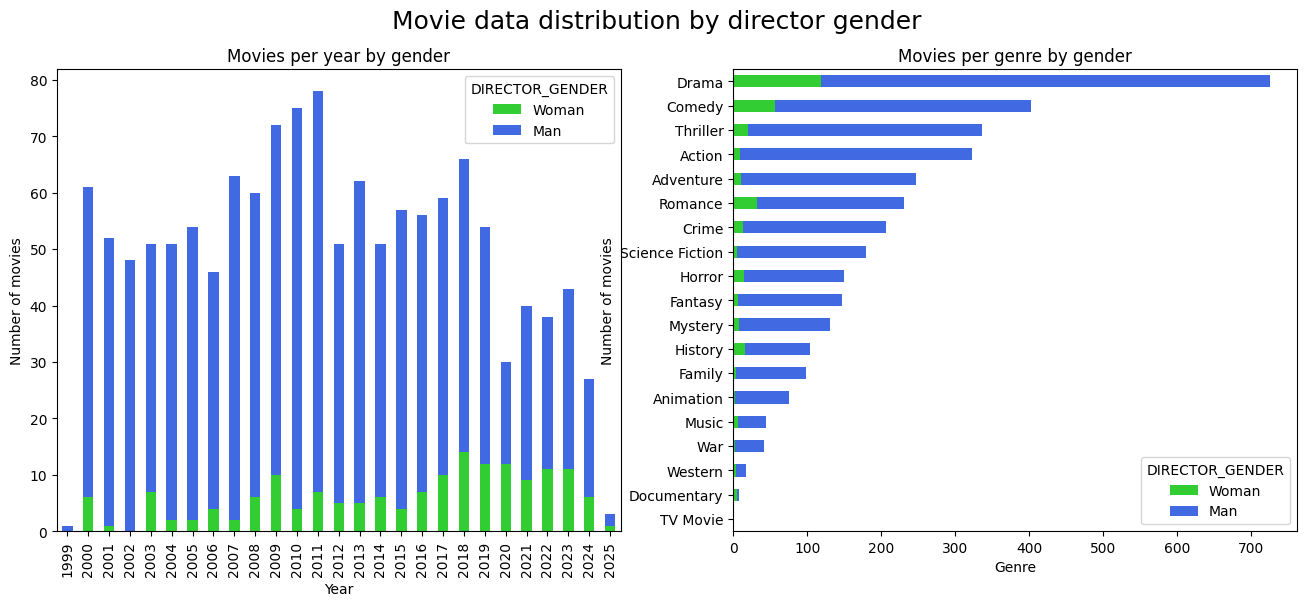

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

movies_per_year_gender.plot(
    kind='bar',
    stacked=True,
    ax=axes[0],
    color=['limegreen', 'royalblue'])

axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of movies')
axes[0].set_title('Movies per year by gender')

genre_counts_gender.plot(
    kind='barh',
    stacked=True,
    ax=axes[1],
    color=['limegreen', 'royalblue'])

axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Number of movies')
axes[1].set_title('Movies per genre by gender')

plt.suptitle("Movie data distribution by director gender", fontsize = 18)
plt.savefig(f"{output_dir}/director_year_genre.png", dpi=300, bbox_inches="tight")
plt.show()

Budget and revenue

In [ ]:
movies_data_money = movies_data[(movies_data['BUDGET'] != 0) & (movies_data['REVENUE'] != 0)]

In [ ]:
movies_data_money['REVENUE'].isna().sum()

np.int64(0)

In [ ]:
movies_data_money[['BUDGET [million dollars]', 'REVENUE [million dollars]']] = movies_data_money[['BUDGET', 'REVENUE']].apply(lambda x: round(x.astype(int)/1000000,2))

/tmp/ipython-input-1356015795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data_money[['BUDGET [million dollars]', 'REVENUE [million dollars]']] = movies_data_money[['BUDGET', 'REVENUE']].apply(lambda x: round(x.astype(int)/1000000,2))
/tmp/ipython-input-1356015795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data_money[['BUDGET [million dollars]', 'REVENUE [million dollars]']] = movies_data_money[['BUDGET', 'REVENUE']].apply(lambda x: round(x.astype(int)/1000000,2))


In [ ]:
movies_data_money[0:4]

,ID,TITLE,YEAR,MOVIE_ID,GENRES,OVERVIEW,RUNTIME [MIN],RATING,BUDGET,REVENUE,DIRECTOR,DIRECTOR_GENDER,BUDGET [million dollars],REVENUE [million dollars]
0,0,"10,000 BC",2008,7840,"Adventure, Action, Drama, Fantasy",A prehistoric epic that follows a young mammot...,109,5.501,105000000,269784201,Roland Emmerich,Man,105.0,269.78
1,1,12 Strong,2018,429351,"War, Drama, Action, History",A team of special forces head into Afghanistan...,130,6.347,35000000,67450815,Nicolai Fuglsig,Man,35.0,67.45
2,2,12 Years a Slave,2013,76203,"Drama, History","In the pre-Civil War United States, Solomon No...",134,7.936,20000000,187000000,Steve McQueen,Man,20.0,187.00
3,3,127 Hours,2010,44115,"Adventure, Drama, Thriller",The true story of mountain climber Aron Ralsto...,94,7.085,18000000,35700000,Danny Boyle,Man,18.0,35.70


In [ ]:
movies_data_money = movies_data_money[['TITLE', 'DIRECTOR_GENDER', 'BUDGET [million dollars]', 'REVENUE [million dollars]']]

In [ ]:
movies_data_money

,TITLE,DIRECTOR_GENDER,BUDGET [million dollars],REVENUE [million dollars]
0,"10,000 BC",Man,105.0,269.78
1,12 Strong,Man,35.0,67.45
2,12 Years a Slave,Man,20.0,187.00
3,127 Hours,Man,18.0,35.70
4,1408,Man,25.0,133.00
...,...,...,...,...
1346,Zookeeper,Man,80.0,169.90
1347,Zootopia,Man,150.0,1025.52
1348,mid90s,Man,1.7,9.30
1349,mother!,Man,30.0,44.52


/tmp/ipython-input-4068175197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


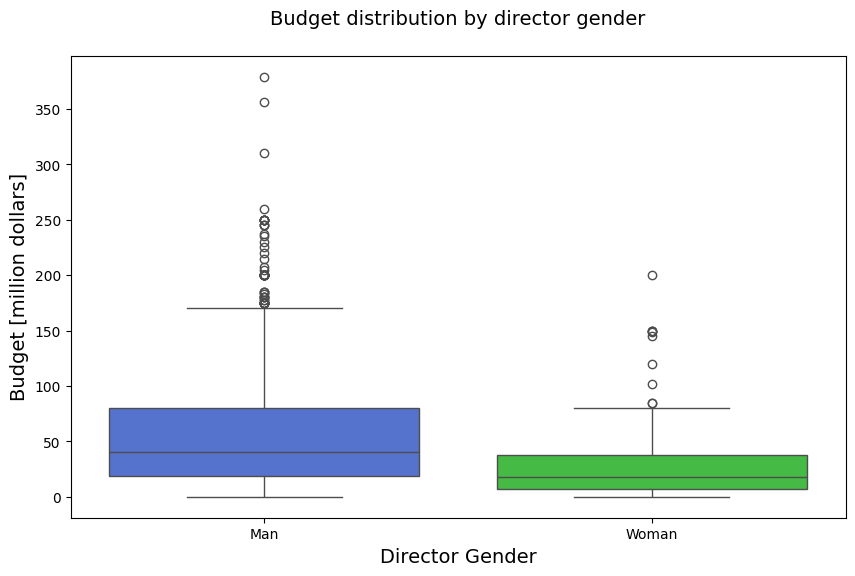

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=movies_data_money,
    x='DIRECTOR_GENDER',
    y='BUDGET [million dollars]',
    palette=['royalblue','limegreen'])

plt.title('Budget distribution by director gender', fontsize=14, y=1.05)
plt.ylabel('Budget [million dollars]', fontsize=14)
plt.xlabel('Director Gender', fontsize=14)
plt.savefig(f"{output_dir}/director_budget.png", dpi=300, bbox_inches="tight")
plt.show()


/tmp/ipython-input-3263432555.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


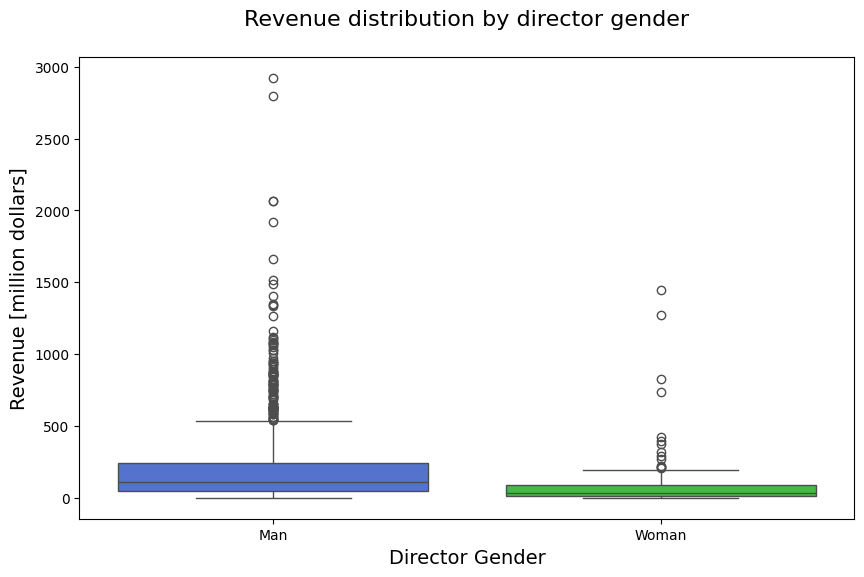

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=movies_data_money,
    x='DIRECTOR_GENDER',
    y='REVENUE [million dollars]',
    palette=['royalblue','limegreen'])

plt.title('Revenue distribution by director gender', fontsize=16, y=1.05)
plt.ylabel('Revenue [million dollars]', fontsize=14)
plt.xlabel('Director Gender', fontsize=14)
plt.savefig(f"{output_dir}/revenue_gender.png", dpi=300, bbox_inches="tight")
plt.show()

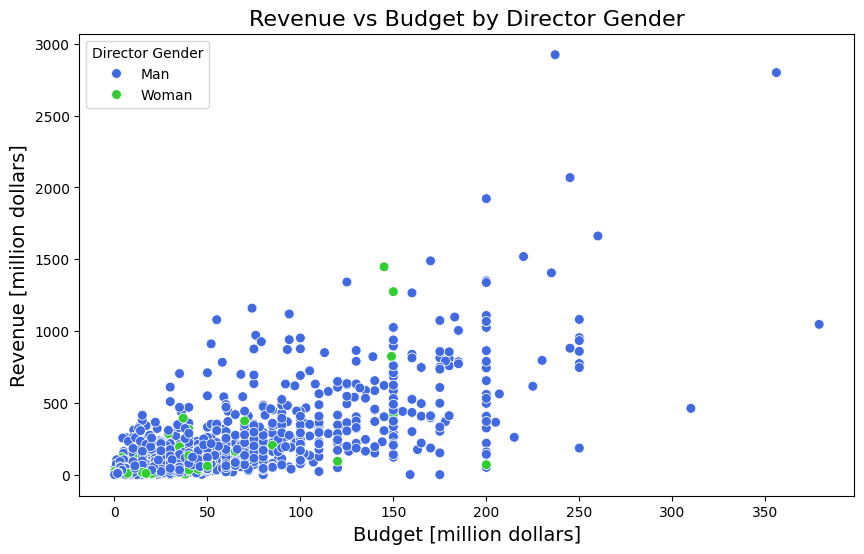

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=movies_data_money,
    x='BUDGET [million dollars]',
    y='REVENUE [million dollars]',
    hue='DIRECTOR_GENDER',
    palette=['royalblue','limegreen'],
    s=50
)
plt.title('Revenue vs Budget by Director Gender', fontsize=16)
plt.xlabel('Budget [million dollars]', fontsize=14)
plt.ylabel('Revenue [million dollars]', fontsize=14)
plt.legend(title='Director Gender')
plt.savefig(f"{output_dir}/budget_revenue_scatter_gender.png", dpi=300, bbox_inches="tight")
plt.show()

Ratings

In [ ]:
movies_data['RATING'] = movies_data['RATING'].astype(float)

In [ ]:
rating_movies = movies_data[['TITLE','RATING','DIRECTOR_GENDER']]

/tmp/ipython-input-675922062.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


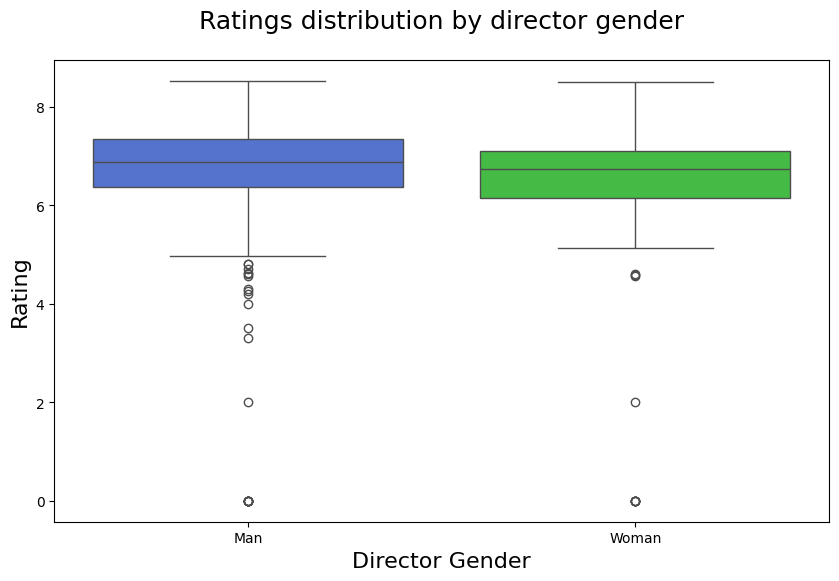

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=rating_movies,
    x='DIRECTOR_GENDER',
    y='RATING',
    palette=['royalblue', 'limegreen'])

plt.title('Ratings distribution by director gender', fontsize=18, y=1.05)
plt.ylabel('Rating', fontsize=16)
plt.xlabel('Director Gender', fontsize=16)
plt.show()


In [ ]:
quartiles=rating_movies.groupby('DIRECTOR_GENDER')['RATING'].quantile([0.25, 0.5, 0.75]).unstack()

quartiles['IQR'] = quartiles[0.75] - quartiles[0.25]

quartiles['Lower Whisker'] = quartiles[0.25] - 1.5 * quartiles['IQR']
quartiles['Upper Whisker'] = quartiles[0.75] + 1.5 * quartiles['IQR']

In [ ]:
quartiles

,0.25,0.5,0.75,IQR,Lower Whisker,Upper Whisker
DIRECTOR_GENDER,,,,,,
Man,6.38300,6.8770,7.35500,0.9720,4.9250,8.8130
Woman,6.15575,6.7495,7.11125,0.9555,4.7225,8.5445


## Cast dataset

In [ ]:
cast_data = pd.read_csv('/content/drive/MyDrive/PROJECT/movie_screenplays/cast_data_final_checked.csv')

In [ ]:
cast_data

,TITLE,CHARACTER,DIALOGUES_COUNT,WORD_COUNT,DIALOGUE,GENDER,AGE_AT_RELEASE
0,"10,000 BC",Baku,23,121,When will the Mannaks come Why do they come la...,Man,18
1,"10,000 BC",Dleh,85,464,When they want Why dont you ask them when you ...,Man,22
2,"10,000 BC",Evolet,19,105,Hungry little brother Old Mother spoke with Ti...,Woman,22
3,"10,000 BC",Karen,13,84,He has proven himself as none of us ever will ...,Man,Unknown
4,"10,000 BC",Nakudu,31,260,You speak to the Spear Tooth Come You not like...,Man,Unknown
...,...,...,...,...,...,...,...
8396,xXx,Petra,64,833,My goodness a word with four syllables I shoul...,Woman,Unknown
8397,xXx,Sam tannick,12,104,Come What do you have He was the best there wa...,Man,Unknown
8398,xXx,Shavers,12,189,Figures You got someplace we can spread out my...,Man,26
8399,xXx,Xander,261,3012,Sky you there Start packin cause we are out of...,Man,35


In [ ]:
cast_data = cast_data[~cast_data['GENDER'].isin(['Unknown','Other'])]

Characters gender (by director's gender)

In [ ]:
cast_data_dir_gender = cast_data.merge(movies_data[['TITLE', 'DIRECTOR_GENDER']], on='TITLE', how='left')
cast_data_dir_gender_men = cast_data_dir_gender[cast_data_dir_gender['DIRECTOR_GENDER'] == 'Man']
cast_data_dir_gender_women = cast_data_dir_gender[cast_data_dir_gender['DIRECTOR_GENDER'] == 'Woman']

In [ ]:
cast_data_dir_gender

,TITLE,CHARACTER,DIALOGUES_COUNT,WORD_COUNT,DIALOGUE,GENDER,AGE_AT_RELEASE,DIRECTOR_GENDER
0,"10,000 BC",Baku,23,121,When will the Mannaks come Why do they come la...,Man,18,Man
1,"10,000 BC",Dleh,85,464,When they want Why dont you ask them when you ...,Man,22,Man
2,"10,000 BC",Evolet,19,105,Hungry little brother Old Mother spoke with Ti...,Woman,22,Man
3,"10,000 BC",Karen,13,84,He has proven himself as none of us ever will ...,Man,Unknown,Man
4,"10,000 BC",Nakudu,31,260,You speak to the Spear Tooth Come You not like...,Man,Unknown,Man
...,...,...,...,...,...,...,...,...
8368,xXx,Petra,64,833,My goodness a word with four syllables I shoul...,Woman,Unknown,Man
8369,xXx,Sam tannick,12,104,Come What do you have He was the best there wa...,Man,Unknown,Man
8370,xXx,Shavers,12,189,Figures You got someplace we can spread out my...,Man,26,Man
8371,xXx,Xander,261,3012,Sky you there Start packin cause we are out of...,Man,35,Man


In [ ]:
cast_data_dir_gender_counts = cast_data['GENDER'].value_counts()
cast_data_dir_gender_men_counts = (cast_data_dir_gender_men['GENDER'].value_counts())
cast_data_dir_gender_women_counts = (cast_data_dir_gender_women['GENDER'].value_counts())

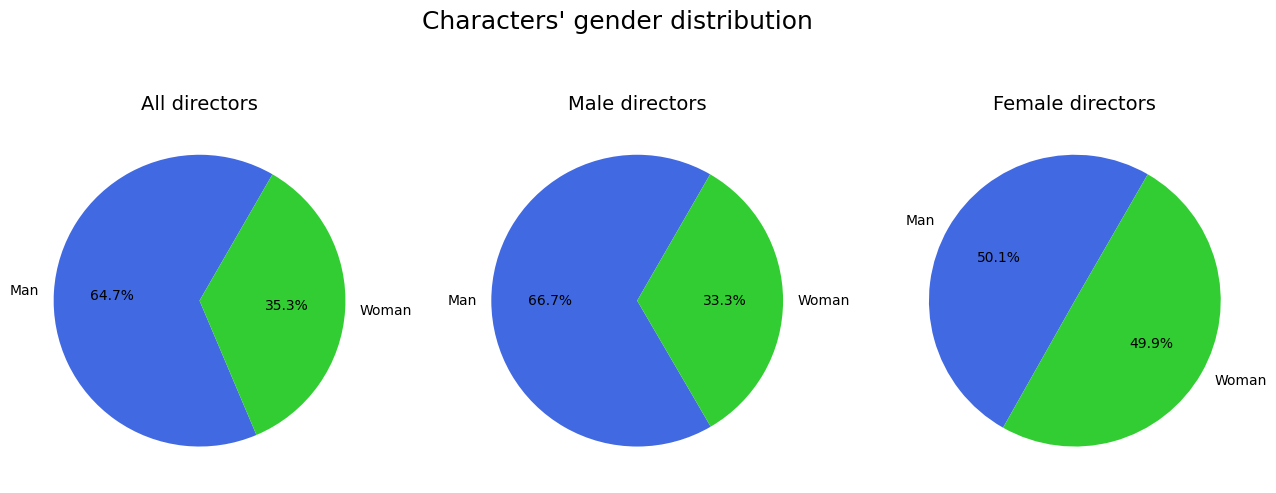

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].pie(
    cast_data_dir_gender_counts.values,
    labels=cast_data_dir_gender_counts.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=['royalblue', 'limegreen'])

axes[0].set_title("All directors", fontsize=14)

axes[1].pie(
    cast_data_dir_gender_men_counts.values,
    labels=cast_data_dir_gender_men_counts.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=['royalblue', 'limegreen'])

axes[1].set_title("Male directors", fontsize=14)

axes[2].pie(
    cast_data_dir_gender_women_counts.values,
    labels=cast_data_dir_gender_women_counts.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=['royalblue', 'limegreen'])

axes[2].set_title("Female directors", fontsize=14)

plt.suptitle("Characters' gender distribution", fontsize=18)
plt.savefig(f"{output_dir}/characters_director_gender.png", dpi=300, bbox_inches="tight")
plt.show()


Movie stats by director's gender

In [ ]:
cast_data_dir_gender_men_counts = (cast_data_dir_gender_men['GENDER'].value_counts())
cast_data_dir_gender_men_dialgues_num_count = cast_data_dir_gender_men.groupby('GENDER')['DIALOGUES_COUNT'].sum()
cast_data_dir_gender_men_words_num_count = cast_data_dir_gender_men.groupby('GENDER')['WORD_COUNT'].sum()

In [ ]:
cast_data_dir_gender_women_counts = (cast_data_dir_gender_women['GENDER'].value_counts())
cast_data_dir_gender_women_dialgues_num_count = cast_data_dir_gender_women.groupby('GENDER')['DIALOGUES_COUNT'].sum()
cast_data_dir_gender_women_words_num_count = cast_data_dir_gender_women.groupby('GENDER')['WORD_COUNT'].sum()

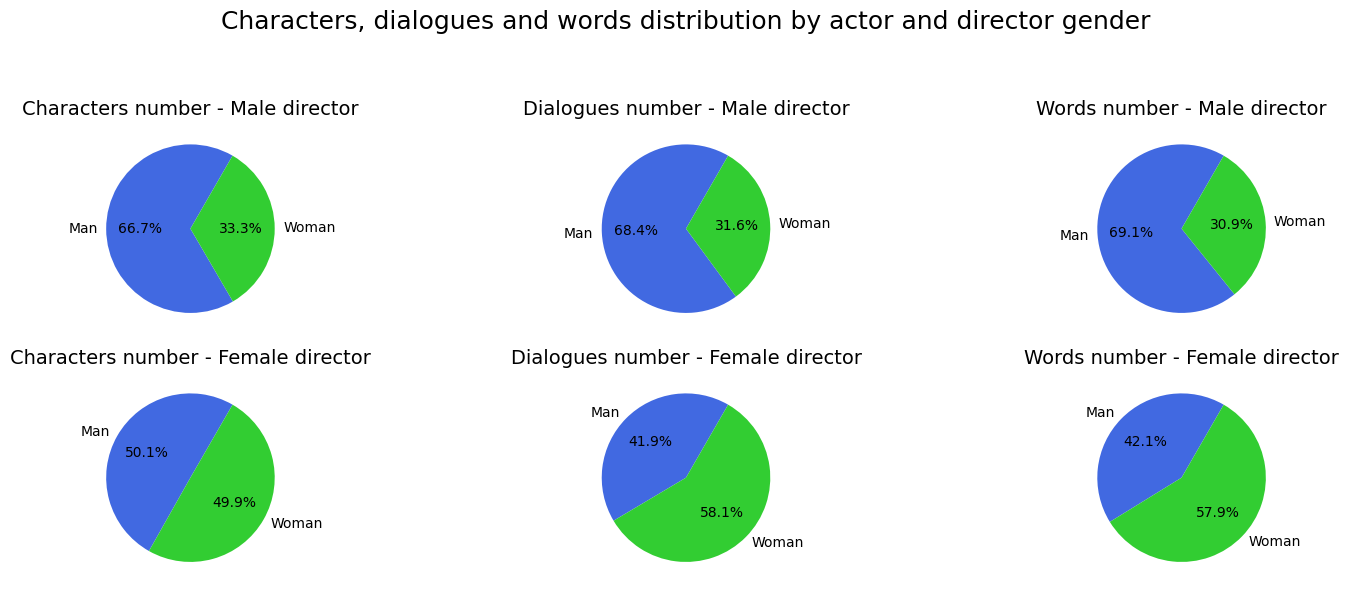

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 6))

axes[0][0].pie(
    cast_data_dir_gender_men_counts.values,
    labels=cast_data_dir_gender_men_counts.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=['royalblue', 'limegreen'])

axes[0][0].set_title("Characters number - Male director", fontsize=14)

axes[0][1].pie(
    cast_data_dir_gender_men_dialgues_num_count.values,
    labels=cast_data_dir_gender_men_dialgues_num_count.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=['royalblue', 'limegreen'])

axes[0][1].set_title("Dialogues number - Male director", fontsize=14)

axes[0][2].pie(
    cast_data_dir_gender_men_words_num_count.values,
    labels=cast_data_dir_gender_men_words_num_count.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=['royalblue', 'limegreen'])

axes[0][2].set_title("Words number - Male director", fontsize=14)

axes[1][0].pie(
    cast_data_dir_gender_women_counts.values,
    labels=cast_data_dir_gender_women_counts.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=['royalblue', 'limegreen'])

axes[1][0].set_title("Characters number - Female director", fontsize=14)

axes[1][1].pie(
    cast_data_dir_gender_women_dialgues_num_count.values,
    labels=cast_data_dir_gender_women_dialgues_num_count.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=['royalblue', 'limegreen'])

axes[1][1].set_title("Dialogues number - Female director", fontsize=14)

axes[1][2].pie(
    cast_data_dir_gender_women_words_num_count.values,
    labels=cast_data_dir_gender_women_words_num_count.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=['royalblue', 'limegreen'])

axes[1][2].set_title("Words number - Female director", fontsize=14)


plt.suptitle("Characters, dialogues and words distribution by actor and director gender", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig(f"{output_dir}/characters_dialogues_words_gender.png", dpi=300, bbox_inches="tight")
plt.show()


Main characters gender (by director's gender)

In [ ]:
main_character = cast_data.loc[cast_data.groupby('TITLE')['DIALOGUES_COUNT'].idxmax()]
main_character[0:4]

,TITLE,CHARACTER,DIALOGUES_COUNT,WORD_COUNT,DIALOGUE,GENDER,AGE_AT_RELEASE
1,"10,000 BC",Dleh,85,464,When they want Why dont you ask them when you ...,Man,22
14,12 Strong,Nelson,275,2368,Im turning it off on the count of three okay O...,Man,35
26,12 Years a Slave,Solomon,142,878,I will catch you Anne Mr Parker We are in need...,Man,36
28,127 Hours,Aron,200,1170,Woah Nearly missed it Friday night April th tw...,Man,32


In [ ]:
main_character_dir_gender = main_character.merge(movies_data[['TITLE', 'DIRECTOR_GENDER']], on='TITLE', how='left')
main_character_dir_gender_men = main_character_dir_gender[main_character_dir_gender['DIRECTOR_GENDER'] == 'Man']
main_character_dir_gender_women = main_character_dir_gender[main_character_dir_gender['DIRECTOR_GENDER'] == 'Woman']

In [ ]:
main_character_dir_gender_counts = (main_character_dir_gender['GENDER'].value_counts())
main_character_dir_gender_men_counts = (main_character_dir_gender_men['GENDER'].value_counts())
main_character_dir_gender_women_counts = (main_character_dir_gender_women['GENDER'].value_counts())

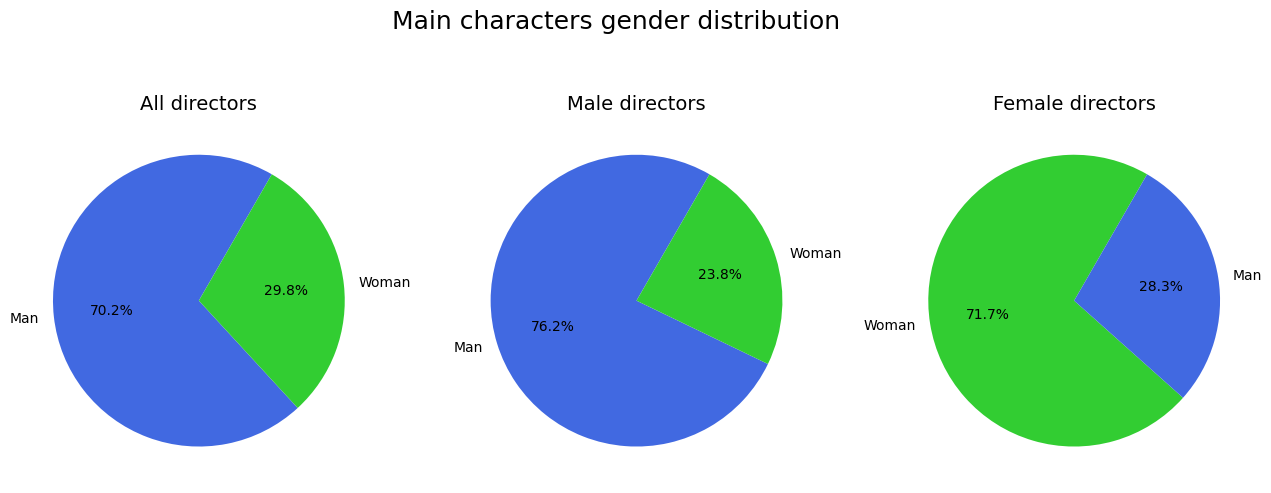

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].pie(
    main_character_dir_gender_counts.values,
    labels=main_character_dir_gender_counts.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=['royalblue', 'limegreen'])

axes[0].set_title("All directors", fontsize=14)

axes[1].pie(
    main_character_dir_gender_men_counts.values,
    labels=main_character_dir_gender_men_counts.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=['royalblue', 'limegreen'])

axes[1].set_title("Male directors", fontsize=14)

axes[2].pie(
    main_character_dir_gender_women_counts.values,
    labels=main_character_dir_gender_women_counts.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=['limegreen', 'royalblue'])

axes[2].set_title("Female directors", fontsize=14)

plt.suptitle("Main characters gender distribution", fontsize=18)
plt.savefig(f"{output_dir}/main_characters_gender.png", dpi=300, bbox_inches="tight")
plt.show()


Movies stats (by gender and year)

In [ ]:
cast_data_movie = cast_data.merge(movies_data[['TITLE', 'YEAR', 'GENRES', 'DIRECTOR_GENDER']], on='TITLE', how='left')

In [ ]:
cast_data_movie[0:4]

,TITLE,CHARACTER,DIALOGUES_COUNT,WORD_COUNT,DIALOGUE,GENDER,AGE_AT_RELEASE,YEAR,GENRES,DIRECTOR_GENDER
0,"10,000 BC",Baku,23,121,When will the Mannaks come Why do they come la...,Man,18,2008.0,"Adventure, Action, Drama, Fantasy",Man
1,"10,000 BC",Dleh,85,464,When they want Why dont you ask them when you ...,Man,22,2008.0,"Adventure, Action, Drama, Fantasy",Man
2,"10,000 BC",Evolet,19,105,Hungry little brother Old Mother spoke with Ti...,Woman,22,2008.0,"Adventure, Action, Drama, Fantasy",Man
3,"10,000 BC",Karen,13,84,He has proven himself as none of us ever will ...,Man,Unknown,2008.0,"Adventure, Action, Drama, Fantasy",Man


In [ ]:
cast_data_movie = cast_data_movie[cast_data_movie['YEAR'].notna()]

In [ ]:
cast_data_movie['YEAR'] = cast_data_movie['YEAR'].astype('int')

In [ ]:
cast_data_year_count = cast_data_movie.groupby(['YEAR', 'GENDER'])['CHARACTER'].count().unstack(fill_value=0).sort_index()
cast_data_year_dialogues_count = cast_data_movie.groupby(['YEAR', 'GENDER'])['DIALOGUES_COUNT'].sum().unstack(fill_value=0).sort_index()
cast_data_year_words_count = cast_data_movie.groupby(['YEAR', 'GENDER'])['WORD_COUNT'].sum().unstack(fill_value=0).sort_index()

In [ ]:
cast_data_year_count_norm = (cast_data_year_count.div(cast_data_year_count.sum(axis=1), axis=0))
cast_data_year_dialogues_count_norm = (cast_data_year_dialogues_count.div(cast_data_year_dialogues_count.sum(axis=1), axis=0))
cast_data_year_words_count_norm = (cast_data_year_words_count.div(cast_data_year_words_count.sum(axis=1), axis=0))

In [ ]:
cast_data_year_count_norm[0:4]

GENDER,Man,Woman
YEAR,,
2000,0.730337,0.269663
2001,0.710526,0.289474
2002,0.706564,0.293436
2003,0.713333,0.286667


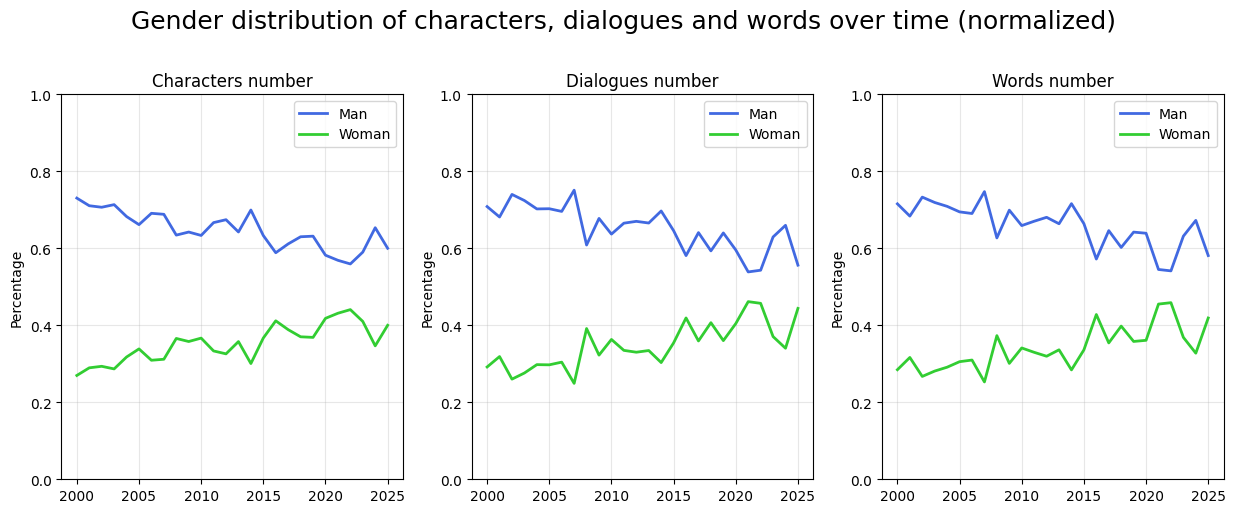

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(
    cast_data_year_count_norm.index,
    cast_data_year_count_norm['Man'],
    color='royalblue',
    linewidth=2,
    label='Man')
axes[0].plot(
    cast_data_year_count_norm.index,
    cast_data_year_count_norm['Woman'],
    color='limegreen',
    linewidth=2,
    label='Woman')
axes[0].set_ylim(0, 1)
axes[0].set_title('Characters number')
axes[0].set_ylabel('Percentage')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].plot(
    cast_data_year_dialogues_count_norm.index,
    cast_data_year_dialogues_count_norm['Man'],
    color='royalblue',
    linewidth=2,
    label='Man')
axes[1].plot(
    cast_data_year_dialogues_count_norm.index,
    cast_data_year_dialogues_count_norm['Woman'],
    color='limegreen',
    linewidth=2,
    label='Woman')
axes[1].set_ylim(0, 1)
axes[1].set_title('Dialogues number')
axes[1].set_ylabel('Percentage')
axes[1].legend()
axes[1].grid(alpha=0.3)

axes[2].plot(
    cast_data_year_words_count_norm.index,
    cast_data_year_words_count_norm['Man'],
    color='royalblue',
    linewidth=2,
    label='Man')
axes[2].plot(
    cast_data_year_words_count_norm.index,
    cast_data_year_words_count_norm['Woman'],
    color='limegreen',
    linewidth=2,
    label='Woman')
axes[2].set_ylim(0, 1)
axes[2].set_title('Words number')
axes[2].set_ylabel('Percentage')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.suptitle("Gender distribution of characters, dialogues and words over time (normalized)", fontsize=18, y=1.05)
plt.savefig(f"{output_dir}/characters_dialogues_words_year_gender.png", dpi=300, bbox_inches="tight")
plt.show()


Characters gender by genre

In [ ]:
genre_one_hot = movies_data['GENRES'].str.get_dummies(sep=', ')
genre_one_hot = pd.concat([movies_data['TITLE'],genre_one_hot], axis=1)

In [ ]:
cast_genre_one_hot = genre_one_hot.merge(cast_data[['TITLE', 'GENDER']], on='TITLE', how='left')

In [ ]:
cast_genre_one_hot.drop(columns = 'TITLE', inplace=True)

In [ ]:
cols = cast_genre_one_hot.columns

In [ ]:
cols = cols[:-1]

In [ ]:
cols

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
cast_genre_gender_counts = (cast_genre_one_hot.groupby('GENDER')[cols].sum().T)

In [ ]:
cast_genre_gender_counts = cast_genre_gender_counts[cast_genre_gender_counts['Man'] != 0]

In [ ]:
cast_genre_gender_counts_norm = cast_genre_gender_counts.div(cast_genre_gender_counts.sum(axis=1), axis=0)

<Figure size 600x600 with 0 Axes>

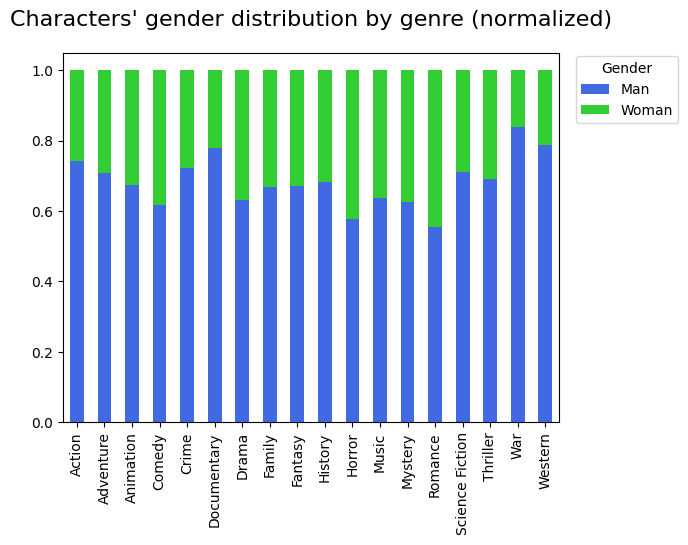

In [ ]:
plt.figure(figsize=(6, 6))

ax = cast_genre_gender_counts_norm.plot(
    kind='bar',
    stacked=True,
    color=['royalblue', 'limegreen'])

ax.legend(
    title='Gender',
    loc='center left',
    bbox_to_anchor=(1.02, 0.9)
)


ax.set_title("Characters' gender distribution by genre (normalized)", fontsize=16, y=1.05)
plt.savefig(f"{output_dir}/characters_genre_gender.png", dpi=300, bbox_inches="tight")
plt.show()

Actors age

In [ ]:
actors_per_age_gender_filtered = cast_data[cast_data['AGE_AT_RELEASE'] != 'Unknown']
actors_per_age_gender_filtered['AGE_AT_RELEASE'] = actors_per_age_gender_filtered['AGE_AT_RELEASE'].astype(int)

In [ ]:
actors_per_age_gender_filtered['GENDER']=pd.Categorical(actors_per_age_gender_filtered['GENDER'], categories=['Man', 'Woman'], ordered=True)

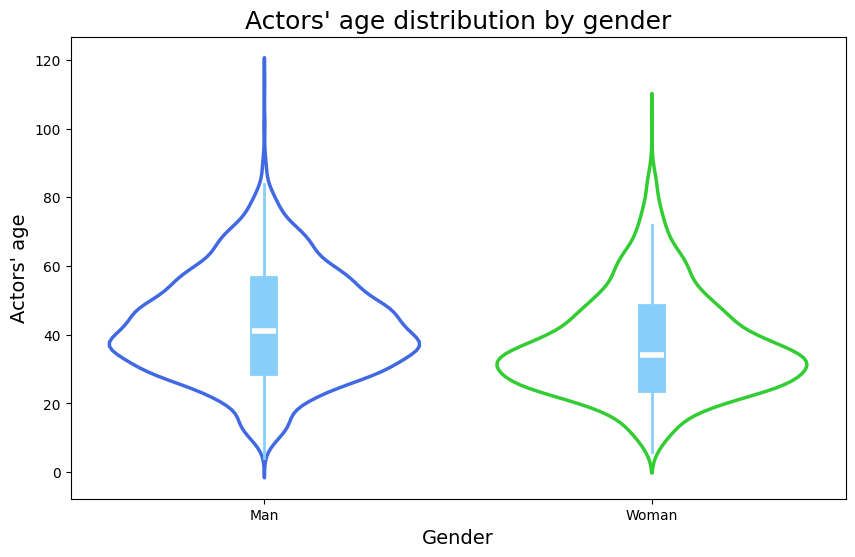

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=actors_per_age_gender_filtered, x='GENDER', y='AGE_AT_RELEASE', hue='GENDER', palette=['royalblue', 'limegreen'], fill=False, linewidth=2.5, inner_kws=dict(box_width=20, whis_width=2, color='lightskyblue'))

plt.title("Actors' age distribution by gender", fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel("Actors' age", fontsize=14)
plt.savefig(f"{output_dir}/actors_age_gender.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
quartiles=actors_per_age_gender_filtered.groupby('GENDER')['AGE_AT_RELEASE'].quantile([0.25, 0.5, 0.75]).unstack()

quartiles['IQR'] = quartiles[0.75] - quartiles[0.25]

quartiles['Lower Whisker'] = quartiles[0.25] - 1.5 * quartiles['IQR']
quartiles['Upper Whisker'] = quartiles[0.75] + 1.5 * quartiles['IQR']

/tmp/ipython-input-3947119225.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartiles=actors_per_age_gender_filtered.groupby('GENDER')['AGE_AT_RELEASE'].quantile([0.25, 0.5, 0.75]).unstack()


In [ ]:
quartiles

,0.25,0.5,0.75,IQR,Lower Whisker,Upper Whisker
GENDER,,,,,,
Man,32.0,41.0,53.0,21.0,0.5,84.5
Woman,27.0,34.0,45.0,18.0,0.0,72.0


Sentiment analysis

In [ ]:
dialogues_sentiment = pd.read_csv('/content/drive/MyDrive/PROJECT/movie_screenplays/dialogues_data_final_sentiment_emotion.csv')

In [ ]:
dialogues_sentiment

,Title,Character,Gender,Dialogue,Sentiment_Label,Sentiment_Confidence,Anger,Fear,Joy,Love,Sadness,Surprise
0,A History of Violence,Billy,Man,You think maybe we could just turn around,neutral,0.752003,0.006424,0.006397,0.980991,0.003683,0.001661,0.000843
1,A History of Violence,Billy,Man,shorter chunkier wearing jeans and an old John...,neutral,0.791999,0.070729,0.003774,0.794046,0.003214,0.127545,0.000693
2,A History of Violence,Billy,Man,Yeah I guess Im just tired though,Unknown,0.490806,0.016421,0.001383,0.006594,0.000522,0.974675,0.000404
3,A History of Violence,Billy,Man,Johnny Leland humming along with Johnny slides...,neutral,0.869295,0.120496,0.007768,0.847967,0.015595,0.007162,0.001013
4,A History of Violence,Billy,Man,Yuh,neutral,0.569538,0.654012,0.103020,0.221834,0.004498,0.013810,0.002827
...,...,...,...,...,...,...,...,...,...,...,...,...
489743,You Can Count on Me,Sammy,Woman,Please dont go till you know where youre going...,neutral,0.648062,0.009457,0.004155,0.980754,0.002881,0.002474,0.000279
489744,You Can Count on Me,Terry,Man,I do know where Im going Im going to Worcester...,neutral,0.646245,0.002900,0.001282,0.989140,0.000891,0.005543,0.000244
489745,You Can Count on Me,Terry,Man,Come on Sammy Look at me Look at me,positive,0.661844,0.738061,0.009986,0.241320,0.003172,0.006337,0.001124
489746,You Can Count on Me,Terry,Man,Hey Sammy Remember when we were kids remember ...,neutral,0.735752,0.165478,0.005948,0.803718,0.007210,0.016390,0.001257


Filtered - only values with confidence over 50%

In [ ]:
dialogues_sentiment['Sentiment_Label'] = dialogues_sentiment['Sentiment_Label'].where(dialogues_sentiment['Sentiment_Confidence'] > 0.5, 'Unknown')

In [ ]:
dialogues_sentiment.drop(columns=['Sentiment_Confidence'], inplace=True)

In [ ]:
emotion_cols = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']

In [ ]:
dialogues_sentiment['Emotion'] = dialogues_sentiment[emotion_cols].idxmax(axis=1)
dialogues_sentiment[0:4]

,Title,Character,Gender,Dialogue,Sentiment_Label,Anger,Fear,Joy,Love,Sadness,Surprise,Emotion
0,A History of Violence,Billy,Man,You think maybe we could just turn around,neutral,0.006424,0.006397,0.980991,0.003683,0.001661,0.000843,Joy
1,A History of Violence,Billy,Man,shorter chunkier wearing jeans and an old John...,neutral,0.070729,0.003774,0.794046,0.003214,0.127545,0.000693,Joy
2,A History of Violence,Billy,Man,Yeah I guess Im just tired though,Unknown,0.016421,0.001383,0.006594,0.000522,0.974675,0.000404,Sadness
3,A History of Violence,Billy,Man,Johnny Leland humming along with Johnny slides...,neutral,0.120496,0.007768,0.847967,0.015595,0.007162,0.001013,Joy


In [ ]:
dialogues_sentiment['Emotion_Confidence'] = dialogues_sentiment[emotion_cols].max(axis=1)
dialogues_sentiment[40000:40004]

,Title,Character,Gender,Dialogue,Sentiment_Label,Anger,Fear,Joy,Love,Sadness,Surprise,Emotion,Emotion_Confidence
40000,This Is 40,Debbie,Woman,Okay No more smoking,neutral,0.190576,0.018989,0.760075,0.007657,0.021622,0.001081,Joy,0.760075
40001,This Is 40,Pete,Man,Yeah youve got to cut that out,negative,0.964920,0.004091,0.024871,0.001298,0.004113,0.000707,Anger,0.964920
40002,This Is 40,Debbie,Woman,I dont want to make this about a fight I want ...,neutral,0.000529,0.000591,0.997922,0.000291,0.000397,0.000270,Joy,0.997922
40003,This Is 40,Pete,Man,Sorry,Unknown,0.426136,0.015227,0.049893,0.007355,0.499764,0.001625,Sadness,0.499764


In [ ]:
dialogues_sentiment['Emotion'] = dialogues_sentiment['Emotion'].where(dialogues_sentiment['Emotion_Confidence'] > 0.5, 'Unknown')

In [ ]:
dialogues_sentiment[40000:40004]

,Title,Character,Gender,Dialogue,Sentiment_Label,Anger,Fear,Joy,Love,Sadness,Surprise,Emotion,Emotion_Confidence
40000,This Is 40,Debbie,Woman,Okay No more smoking,neutral,0.190576,0.018989,0.760075,0.007657,0.021622,0.001081,Joy,0.760075
40001,This Is 40,Pete,Man,Yeah youve got to cut that out,negative,0.964920,0.004091,0.024871,0.001298,0.004113,0.000707,Anger,0.964920
40002,This Is 40,Debbie,Woman,I dont want to make this about a fight I want ...,neutral,0.000529,0.000591,0.997922,0.000291,0.000397,0.000270,Joy,0.997922
40003,This Is 40,Pete,Man,Sorry,Unknown,0.426136,0.015227,0.049893,0.007355,0.499764,0.001625,Unknown,0.499764


In [ ]:
emotion_cols

['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']

In [ ]:
dialogues_sentiment.drop(columns=emotion_cols, inplace=True)

In [ ]:
dialogues_sentiment.drop(columns=['Emotion_Confidence'], inplace=True)

In [ ]:
dialogues_sentiment[40000:40004]

,Title,Character,Gender,Dialogue,Sentiment_Label,Emotion
40000,This Is 40,Debbie,Woman,Okay No more smoking,neutral,Joy
40001,This Is 40,Pete,Man,Yeah youve got to cut that out,negative,Anger
40002,This Is 40,Debbie,Woman,I dont want to make this about a fight I want ...,neutral,Joy
40003,This Is 40,Pete,Man,Sorry,Unknown,Unknown


In [ ]:
dialogues_sentiment = dialogues_sentiment[~dialogues_sentiment['Gender'].isin(['Unknown','Other'])]

In [ ]:
dialogues_sentiment_filtered = dialogues_sentiment[dialogues_sentiment['Sentiment_Label'] != 'Unknown']

In [ ]:
dialogues_sentiment_man = dialogues_sentiment_filtered[dialogues_sentiment_filtered['Gender'] == 'Man']
dialogues_sentiment_woman = dialogues_sentiment_filtered[dialogues_sentiment_filtered['Gender'] == 'Woman']

In [ ]:
dialogues_sentiment_man_norm = dialogues_sentiment_man['Sentiment_Label'].value_counts(normalize=True)
dialogues_sentiment_woman_norm = dialogues_sentiment_woman['Sentiment_Label'].value_counts(normalize=True)

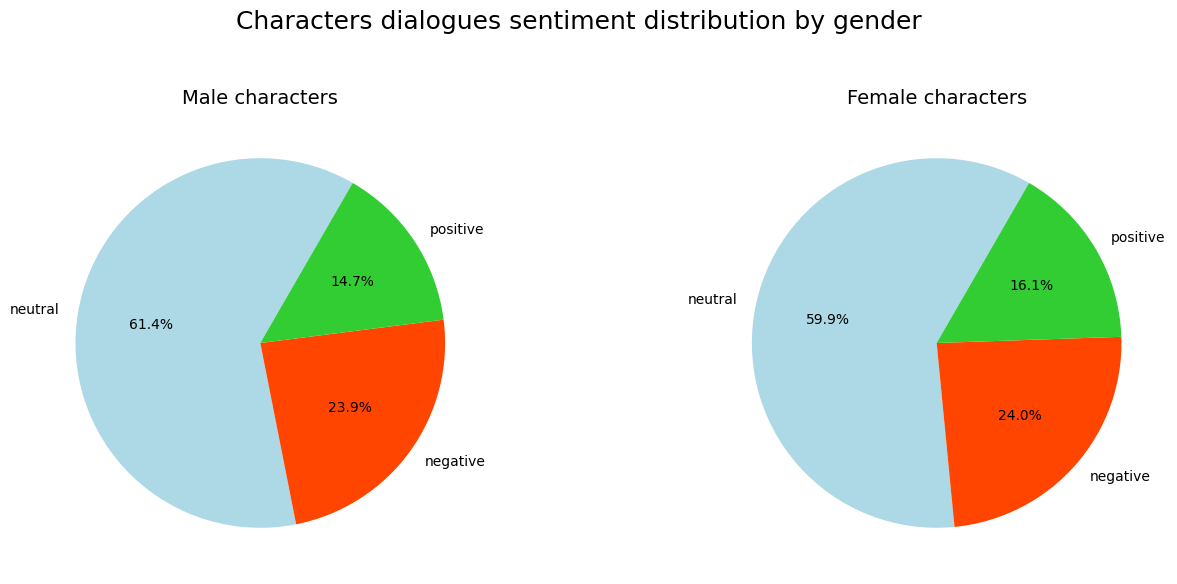

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(
    dialogues_sentiment_man_norm.values,
    labels=dialogues_sentiment_man_norm.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=['lightblue', 'orangered', 'limegreen'])

axes[0].set_title("Male characters", fontsize=14)

axes[1].pie(
    dialogues_sentiment_woman_norm.values,
    labels=dialogues_sentiment_woman_norm.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=['lightblue', 'orangered', 'limegreen'])

axes[1].set_title("Female characters", fontsize=14)

plt.suptitle("Characters dialogues sentiment distribution by gender", fontsize=18, y=1.05)
plt.savefig(f"{output_dir}/sentiment_gender.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
dialogues_emotion_filtered = dialogues_sentiment[dialogues_sentiment['Emotion'] != 'Unknown']

In [ ]:
dialogues_emotion_man = dialogues_emotion_filtered[dialogues_emotion_filtered['Gender'] == 'Man']
dialogues_emotion_woman = dialogues_emotion_filtered[dialogues_emotion_filtered['Gender'] == 'Woman']

In [ ]:
dialogues_emotion_man_norm = dialogues_emotion_man['Emotion'].value_counts(normalize=True)
dialogues_emotion_woman_norm = dialogues_emotion_woman['Emotion'].value_counts(normalize=True)

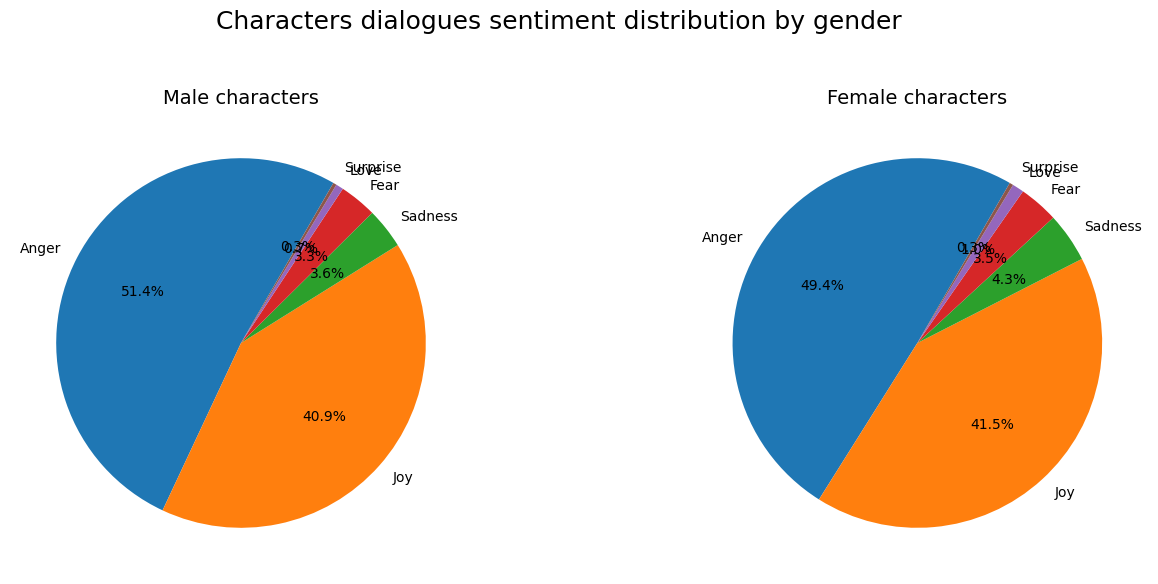

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(
    dialogues_emotion_man_norm.values,
    labels=dialogues_emotion_man_norm.index,
    autopct='%1.1f%%',
    startangle=60)
    #colors=['lightblue', 'orangered', 'limegreen'])

axes[0].set_title("Male characters", fontsize=14)

axes[1].pie(
    dialogues_emotion_woman_norm.values,
    labels=dialogues_emotion_woman_norm.index,
    autopct='%1.1f%%',
    startangle=60)
    #colors=['lightblue', 'orangered', 'limegreen'])

axes[1].set_title("Female characters", fontsize=14)

plt.suptitle("Characters dialogues sentiment distribution by gender", fontsize=18, y=1.05)
plt.show()


### Movies data based on public perception

Target

In [ ]:
titles_source = pd.read_csv('/content/drive/MyDrive/PROJECT/movie_screenplays/movies_final.csv')

In [ ]:
titles_source[0:4]

,ID,TITLE,YEAR,SOURCE,SOURCE2,SCREENPLAY_SOURCE
0,0,"10,000 BC",2008,popular,box_office,simply
1,1,12 Strong,2018,popular,box_office,slug
2,2,12 Years a Slave,2013,"critics, fan_favs, popular","award_winners, best_movies_lists, box_office, ...",slug
3,3,127 Hours,2010,"fan_favs, popular","best_movies_lists, box_office",slug


In [ ]:
titles_source['SOURCE2'] = titles_source['SOURCE2'].str.replace('women_directors', 'women_picks')

In [ ]:
movies_data[0:4]

,ID,TITLE,YEAR,MOVIE_ID,GENRES,OVERVIEW,RUNTIME [MIN],RATING,BUDGET,REVENUE,DIRECTOR,DIRECTOR_GENDER
0,0,"10,000 BC",2008,7840,"Adventure, Action, Drama, Fantasy",A prehistoric epic that follows a young mammot...,109,5.501,105000000,269784201,Roland Emmerich,Man
1,1,12 Strong,2018,429351,"War, Drama, Action, History",A team of special forces head into Afghanistan...,130,6.347,35000000,67450815,Nicolai Fuglsig,Man
2,2,12 Years a Slave,2013,76203,"Drama, History","In the pre-Civil War United States, Solomon No...",134,7.936,20000000,187000000,Steve McQueen,Man
3,3,127 Hours,2010,44115,"Adventure, Drama, Thriller",The true story of mountain climber Aron Ralsto...,94,7.085,18000000,35700000,Danny Boyle,Man


In [ ]:
titles_source_extended = titles_source.merge(movies_data[['TITLE','DIRECTOR_GENDER']], on='TITLE', how='left')

In [ ]:
titles_source_extended

,ID,TITLE,YEAR,SOURCE,SOURCE2,SCREENPLAY_SOURCE,DIRECTOR_GENDER
0,0,"10,000 BC",2008,popular,box_office,simply,Man
1,1,12 Strong,2018,popular,box_office,slug,Man
2,2,12 Years a Slave,2013,"critics, fan_favs, popular","award_winners, best_movies_lists, box_office, ...",slug,Man
3,3,127 Hours,2010,"fan_favs, popular","best_movies_lists, box_office",slug,Man
4,4,1408,2007,popular,box_office,slug,Man
...,...,...,...,...,...,...,...
1351,1351,mid90s,2018,"fan_favs, popular","best_movies_lists, popular_movies_lists",slug,Man
1352,1352,mother!,2017,"fan_favs, popular","best_movies_lists, popular_movies_lists",slug,Man
1353,1352,mother!,2017,"fan_favs, popular","best_movies_lists, popular_movies_lists",slug,Man
1354,1353,"tick, tick... BOOM!",2021,"fan_favs, popular","best_movies_lists, popular_movies_lists",slug,Man


In [ ]:
titles_source_extended.drop(columns={'SCREENPLAY_SOURCE'}, inplace=True)

In [ ]:
source_one_hot = titles_source_extended['SOURCE'].str.get_dummies(sep=', ')
source_one_hot = pd.concat([source_one_hot, titles_source_extended['DIRECTOR_GENDER']], axis=1)
source_one_hot_man = source_one_hot[source_one_hot['DIRECTOR_GENDER'] == 'Man']
source_one_hot_woman = source_one_hot[source_one_hot['DIRECTOR_GENDER'] == 'Woman']
source_one_hot_man_count = source_one_hot_man.drop(columns='DIRECTOR_GENDER').sum()
source_one_hot_woman_count = source_one_hot_woman.drop(columns='DIRECTOR_GENDER').sum()

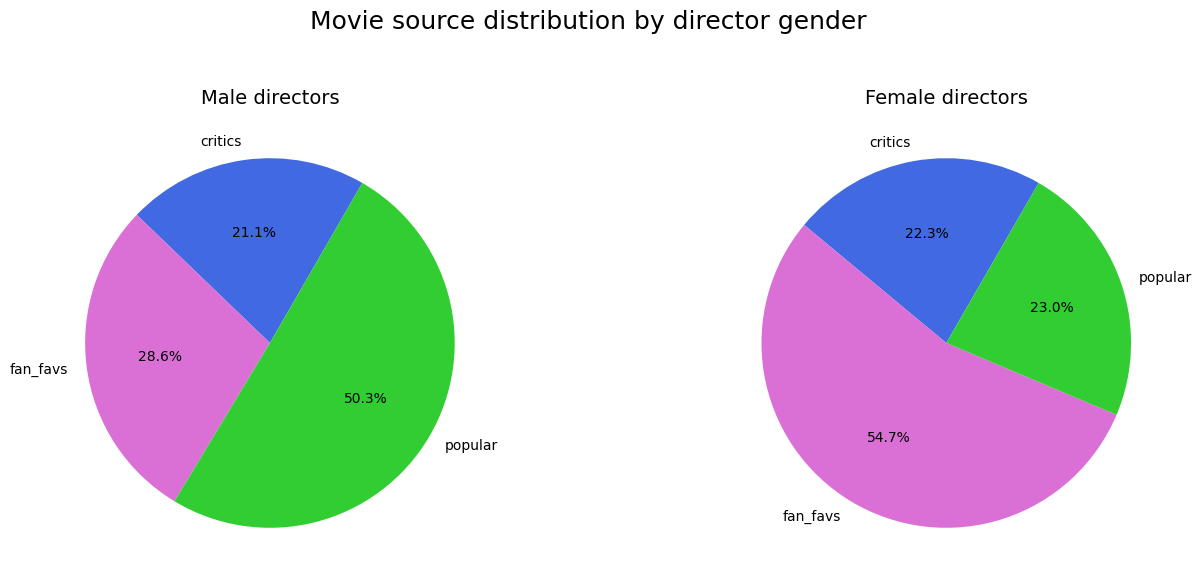

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(
    source_one_hot_man_count.values,
    labels=source_one_hot_man_count.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=['royalblue','orchid', 'limegreen'])

axes[0].set_title("Male directors", fontsize=14)

axes[1].pie(
    source_one_hot_woman_count.values,
    labels=source_one_hot_woman_count.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=['royalblue','orchid', 'limegreen'])

axes[1].set_title("Female directors", fontsize=14)

plt.suptitle("Movie source distribution by director gender", fontsize=18, y=1.05)
plt.savefig(f"{output_dir}/source_gender.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
source2_one_hot = titles_source_extended['SOURCE2'].str.get_dummies(sep=', ')
source2_one_hot = pd.concat([source2_one_hot, titles_source_extended['DIRECTOR_GENDER']], axis=1)
source2_one_hot_man = source2_one_hot[source2_one_hot['DIRECTOR_GENDER'] == 'Man']
source2_one_hot_woman = source2_one_hot[source2_one_hot['DIRECTOR_GENDER'] == 'Woman']
source2_one_hot_man_count = source2_one_hot_man.drop(columns='DIRECTOR_GENDER').sum()
source2_one_hot_woman_count = source2_one_hot_woman.drop(columns='DIRECTOR_GENDER').sum()

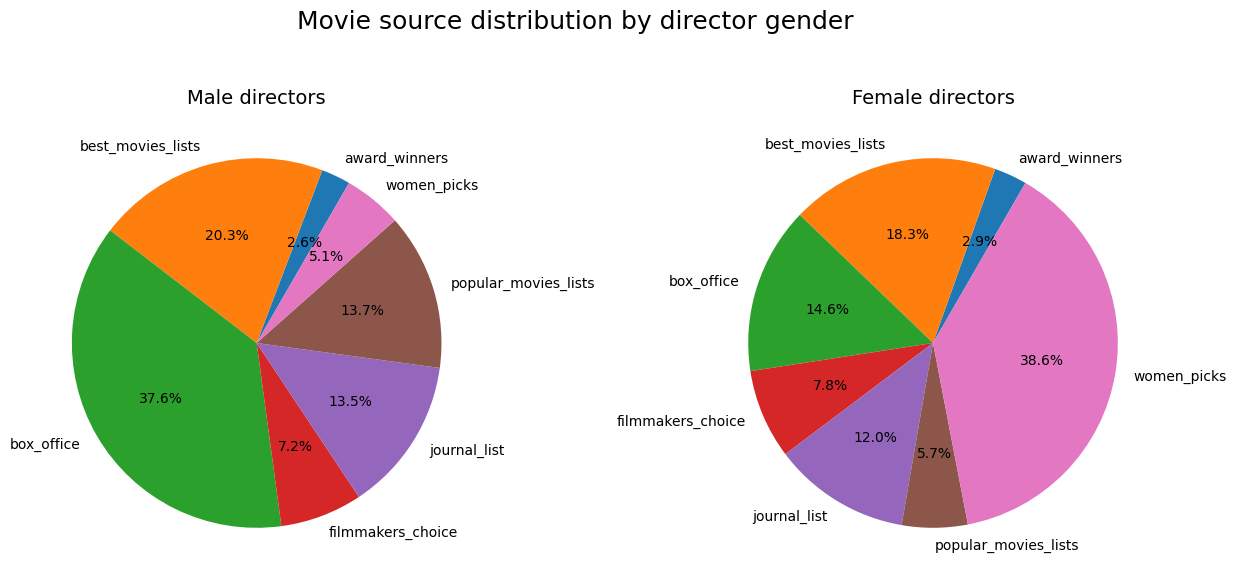

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(
    source2_one_hot_man_count.values,
    labels=source2_one_hot_man_count.index,
    autopct='%1.1f%%',
    startangle=60)
    #colors=['royalblue','orchid', 'limegreen'])

axes[0].set_title("Male directors", fontsize=14)

axes[1].pie(
    source2_one_hot_woman_count.values,
    labels=source2_one_hot_woman_count.index,
    autopct='%1.1f%%',
    startangle=60)
    #colors=['royalblue','orchid', 'limegreen'])

axes[1].set_title("Female directors", fontsize=14)

plt.suptitle("Movie source distribution by director gender", fontsize=18, y=1.05)
plt.savefig(f"{output_dir}/source2_gender.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
titles_source_extended

,ID,TITLE,YEAR,SOURCE,SOURCE2,DIRECTOR_GENDER
0,0,"10,000 BC",2008,popular,box_office,Man
1,1,12 Strong,2018,popular,box_office,Man
2,2,12 Years a Slave,2013,"critics, fan_favs, popular","award_winners, best_movies_lists, box_office, ...",Man
3,3,127 Hours,2010,"fan_favs, popular","best_movies_lists, box_office",Man
4,4,1408,2007,popular,box_office,Man
...,...,...,...,...,...,...
1351,1351,mid90s,2018,"fan_favs, popular","best_movies_lists, popular_movies_lists",Man
1352,1352,mother!,2017,"fan_favs, popular","best_movies_lists, popular_movies_lists",Man
1353,1352,mother!,2017,"fan_favs, popular","best_movies_lists, popular_movies_lists",Man
1354,1353,"tick, tick... BOOM!",2021,"fan_favs, popular","best_movies_lists, popular_movies_lists",Man


In [ ]:
titles_source_extended_cast = titles_source_extended.merge(cast_data[['TITLE', 'CHARACTER', 'GENDER']], on='TITLE', how='inner')

In [ ]:
titles_source_extended_cast.drop(columns={'ID'}, inplace=True)

In [ ]:
titles_source_extended_cast[200:205]

,TITLE,YEAR,SOURCE,SOURCE2,DIRECTOR_GENDER,CHARACTER,GENDER
200,A Haunting in Venice,2023,popular,box_office,Man,Olga seminoff,Woman
201,A Haunting in Venice,2023,popular,box_office,Man,Poirot,Man
202,A Haunting in Venice,2023,popular,box_office,Man,Rowena drake,Woman
203,A Haunting in Venice,2023,popular,box_office,Man,Vitale portfoglio,Man
204,A Hidden Life,2019,"critics, fan_favs","best_movies_lists, journal_list",Man,Fani,Woman


In [ ]:
source2_one_hot_cast = titles_source_extended_cast['SOURCE2'].str.get_dummies(sep=', ')
source2_one_hot_cast = pd.concat([titles_source_extended_cast[['GENDER']], source2_one_hot_cast],axis=1)
source2_man_counts = source2_one_hot_cast[source2_one_hot_cast['GENDER'] == 'Man'].iloc[:, 1:].sum()
source2_woman_counts = source2_one_hot_cast[source2_one_hot_cast['GENDER'] == 'Woman'].iloc[:, 1:].sum()
source2_gender_counts = pd.DataFrame({'Man': source2_man_counts,'Woman': source2_woman_counts})
source2_gender_counts_norm = source2_gender_counts.div(source2_gender_counts.sum(axis=1),axis=0)

In [ ]:
source2_gender_counts_norm

,Man,Woman
award_winners,0.660920,0.339080
best_movies_lists,0.647209,0.352791
box_office,0.673800,0.326200
filmmakers_choice,0.607994,0.392006
journal_list,0.643919,0.356081
popular_movies_lists,0.680046,0.319954
women_picks,0.521791,0.478209


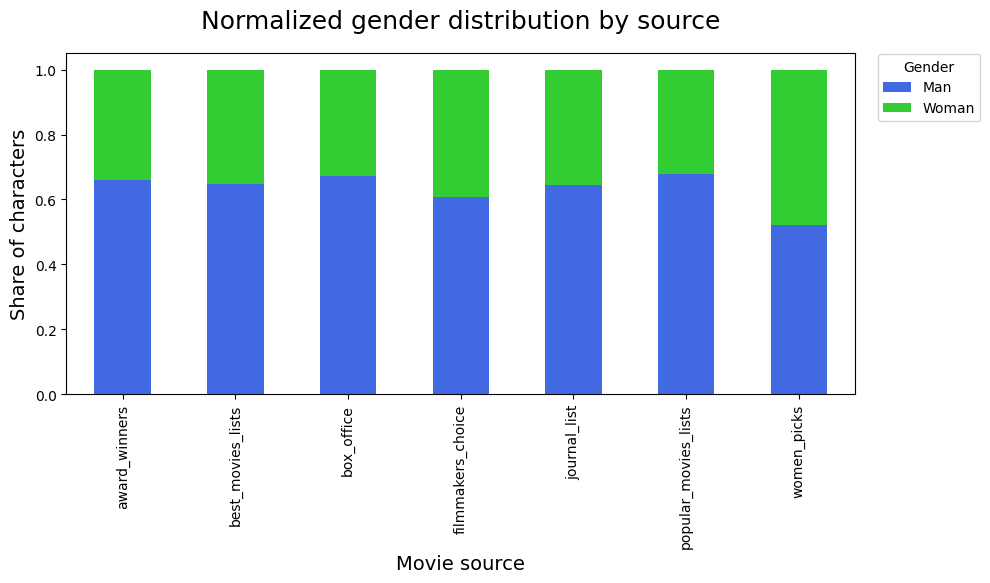

In [ ]:
ax = source2_gender_counts_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['royalblue', 'limegreen']
)

ax.set_ylabel('Share of characters',fontsize=14)
ax.set_xlabel('Movie source', fontsize=14)
ax.set_title('Normalized gender distribution by source', y=1.05,fontsize=18)

ax.legend(
    title='Gender',
    loc='center left',
    bbox_to_anchor=(1.02, 0.9)
)

plt.tight_layout()
plt.savefig(f"{output_dir}/characters_source_gender.png", dpi=300, bbox_inches="tight")
plt.show()

Rating

In [ ]:
main_character = cast_data.loc[cast_data.groupby('TITLE')['DIALOGUES_COUNT'].idxmax()]

In [ ]:
main_character_rating = main_character.merge(movies_data[['TITLE', 'RATING']], on='TITLE', how='left')

/tmp/ipython-input-2529784921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


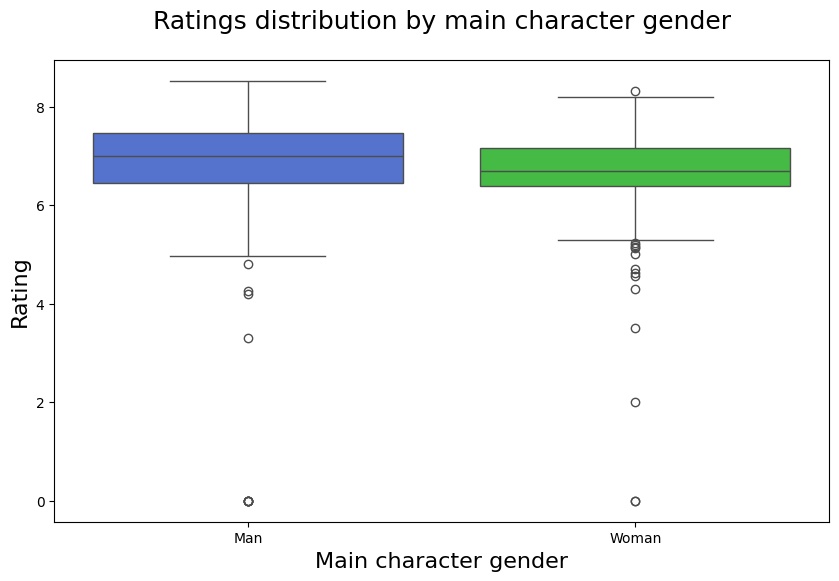

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=main_character_rating,
    x='GENDER',
    y='RATING',
    palette=['royalblue', 'limegreen'])

plt.title('Ratings distribution by main character gender', fontsize=18, y=1.05)
plt.ylabel('Rating', fontsize=16)
plt.xlabel('Main character gender', fontsize=16)
plt.show()
